In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# From above:

# Age - Most of the passengers were below 40, mean could be slightly deviated because of outliers, max age was 80 yr old.
# Fare - max fare was 512, mmost of them paid 31, mean is skewed, possibly bcz of many outliers. 

/home/nikhil/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nikhil/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Age'>

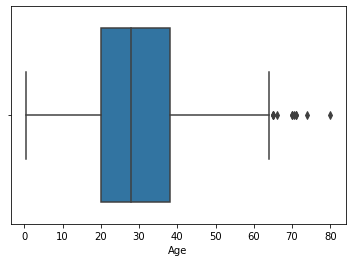

In [7]:
# Age can be visualized as
sns.boxplot(train["Age"],orient="v")
# We see that 75% people are around 40

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

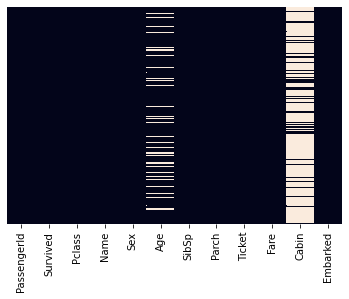

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [10]:
# There are missing values in Age, Cabin and Embarked columns in the datset.
# Remember, the isna() funtion will give True on na value and the sum() function only add the True values.

In [11]:
# Lets plot a descriptive pie chart showing the % of people embarked from different places.
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

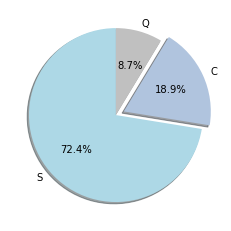

In [12]:
label = [x for x in train.Embarked.value_counts().index]
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
x = plt.pie(train.Embarked.value_counts(),labels=label,autopct='%1.1f%%',colors=my_colors,explode=my_explode,shadow=True,startangle=90)
def reset(event):
    x.set_visible(False)

In [13]:
#Majority of the passengers boarded from Southhampton.

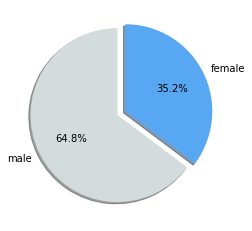

In [14]:
#Lets do the same thing for gender.
night_colors = ['#D3DBDD',  '#57A7F3']
label=[x for x in train.Sex.value_counts().index]
explode= (0,0.1)
x=plt.pie(train.Sex.value_counts(),labels=label,autopct="%1.1f%%",explode=explode,startangle=90,shadow=True,colors=night_colors)
def reset(event):
    x.set_visible(False)

In [15]:
# There are 64.8% male passenger on the ship which is significantly greater than female passenger.

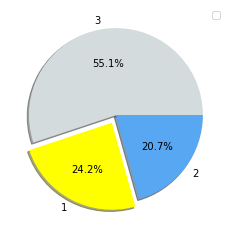

In [16]:
#Lets look athe class.
labels=[x for x in train.Pclass.value_counts().index]
plt.legend(labels,loc="best")
night_colors = ['#D3DBDD',"Yellow", '#57A7F3']
explode=(0,0.1,0)
x=plt.pie(train.Pclass.value_counts(),explode=explode,shadow=True,autopct="%1.1f%%",labels=labels,colors=night_colors)
def reset(event):
    x.set_visible(False)

In [17]:
# We can see that majority of the ticket sold were of class 3

In [18]:
#Lets look at the distrbution of class among sex.

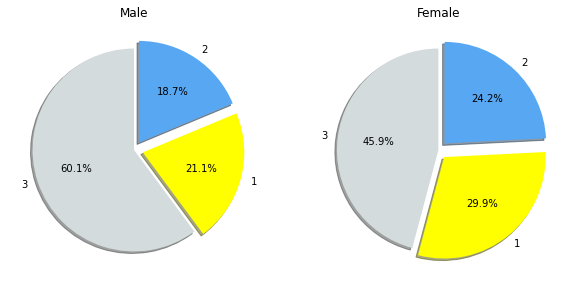

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies
night_colors = ['#D3DBDD',"Yellow", '#57A7F3']


labels=[x for x in train[train["Sex"]=="male"].Pclass.value_counts().index]
explode=(0,0.09,0.09)
ax1.pie(train[train["Sex"]=="male"].Pclass.value_counts(),autopct="%1.1f%%",shadow=True,startangle=90,colors=night_colors,explode=explode,labels=labels)
ax1.set_title("Male")

labelss=[x for x in train[train["Sex"]=="female"].Pclass.value_counts().index]
explode=(0,0.09,0.09)
ax2.pie(train[train["Sex"]=="female"].Pclass.value_counts(),autopct="%1.1f%%",shadow=True,colors=night_colors,startangle=90,explode=explode,labels=labelss)
ax2.set_title("Female")
def reset(event):
    ax1.set_visible(False)

In [20]:
# We see that majority of the people of either sex took tickets of Class 3.

In [21]:
#Lets look at the distribution of Embarkment according to Sex

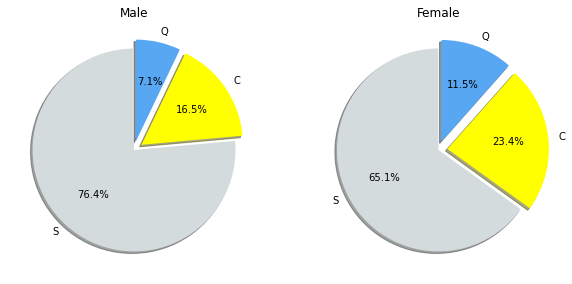

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies
night_colors = ['#D3DBDD',"Yellow", '#57A7F3']


labels=[x for x in train[train["Sex"]=="male"].Embarked.value_counts().index]
explode=(0,0.09,0.09)
ax1.pie(train[train["Sex"]=="male"].Embarked.value_counts(),autopct="%1.1f%%",shadow=True,startangle=90,colors=night_colors,explode=explode,labels=labels)
ax1.set_title("Male")

labelss=[x for x in train[train["Sex"]=="female"].Embarked.value_counts().index]
explode=(0,0.09,0.09)
ax2.pie(train[train["Sex"]=="female"].Embarked.value_counts(),autopct="%1.1f%%",shadow=True,colors=night_colors,startangle=90,explode=explode,labels=labelss)
ax2.set_title("Female")
def reset(event):
    ax1.set_visible(False)

In [23]:
# We see that majority of the people of either sex boarded from S.

#### Lets see the how the survival rate between sex varies?

In [24]:
#sns.barplot(x='Survived',hue="Sex",data=train)

train.Survived.sum() #Tital no of people survived out of 891

342

In [25]:
train.groupby("Sex").Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [26]:
# So, 233 Female survived while only 109 male survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

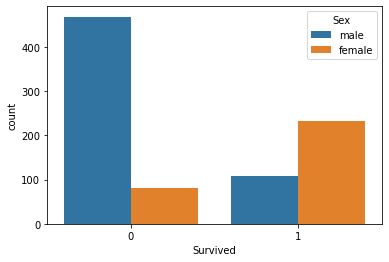

In [27]:
#or
sns.countplot(x="Survived",hue="Sex",data=train)

In [28]:
#or
train[["Survived","Sex"]].groupby("Sex").mean()
#or train.groupby("Sex").Survived.mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
# In %, 74.2% fremale survived while only 18.8% male survived

#### Lets try to see how the survival is distributed among different age groups

<Figure size 864x864 with 0 Axes>

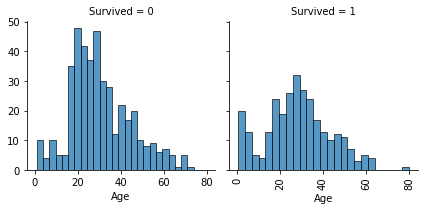

In [30]:
plt.figure(figsize=(12,12))
sns.FacetGrid(train,col="Survived").map(sns.histplot,"Age",bins=25)
plt.xticks(rotation=90)
plt.show()

In [31]:
# We can see that maximum people didn't survive were between 15-40 yr old.

<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

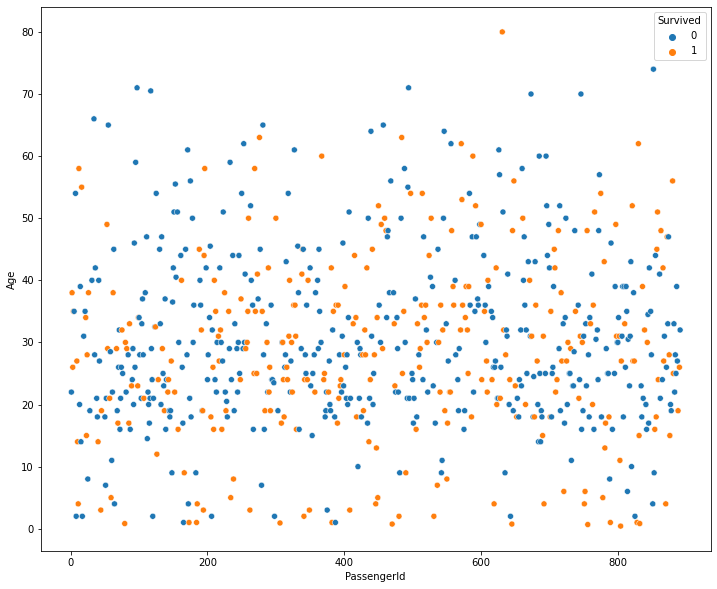

In [32]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="PassengerId",y="Age",hue="Survived",data=train)


In [33]:
# Again we can see that people of age between 15-40 didn't survive, children below 15 had a good survival rate

#### Let's see how the fare affected the survival

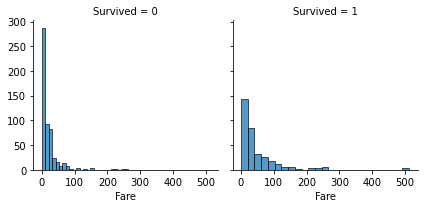

In [34]:
sns.FacetGrid(train,col="Survived").map(sns.histplot,"Fare",bins =25)

In [35]:
# Majority of people died are in the lower fare section, also there is not much data above 100

#### Lets look at the relation between age and Fare

<AxesSubplot:xlabel='Fare', ylabel='Age'>

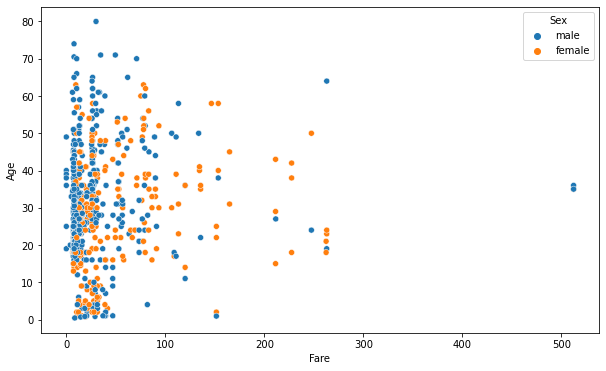

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(y="Age",x="Fare",hue="Sex",data=train)

In [37]:
#The above plot shows that as we move to the higher fare, the probability of survival is quite high

#### Lets see how the class,siblings,embarked affected the survival rate

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

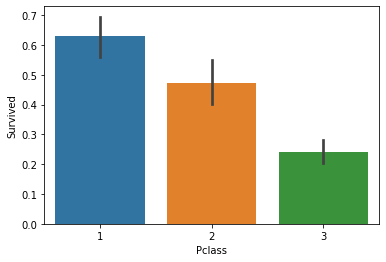

In [38]:
sns.barplot(x="Pclass",y="Survived",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

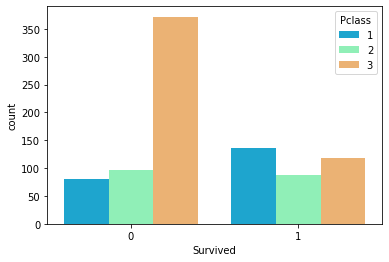

In [39]:
sns.countplot(hue="Pclass",x="Survived",data=train,palette='rainbow')

In [40]:
train.groupby("Pclass").Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [41]:
# We can see that Class 1 people survived the most, probably bcz they paid the sailor off.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

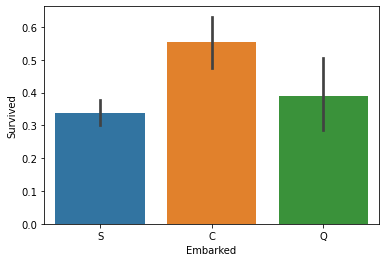

In [42]:
sns.barplot(x="Embarked",y="Survived",data=train)

In [43]:
#or
train.groupby(["Embarked"]).Survived.agg(["count","mean"])

,count,mean
Embarked,,
C,168,0.553571
Q,77,0.389610
S,644,0.336957


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

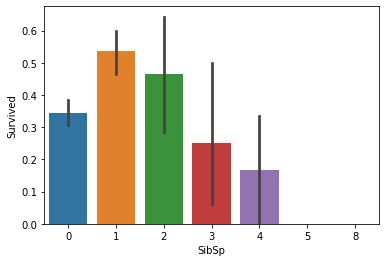

In [44]:
sns.barplot(x="SibSp",y="Survived",data=train)

In [45]:
# People with 1 siblings survived more, people of largefamily size survived less

In [46]:
#or
train.groupby(["Parch"]).Survived.agg(["count","mean"])

,count,mean
Parch,,
0,678,0.343658
1,118,0.550847
2,80,0.500000
3,5,0.600000
4,4,0.000000
5,5,0.200000
6,1,0.000000


In [47]:
# This also shows us the same family size and survival relation.

#### Data encoding- Data encoding means we need to replace string values by integer valus before we feed the data to a machine learning model because models don't know how to handle string values.

In [48]:
# We can encode Male as 1 and Female as 0.

In [49]:
x = train["Sex"].replace({"male":1,"female":0})

In [50]:
train.insert(5,column="Gender",value=x)

In [51]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.25,NaN,S


In [52]:
# Let's try to encode Embarked column

In [53]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

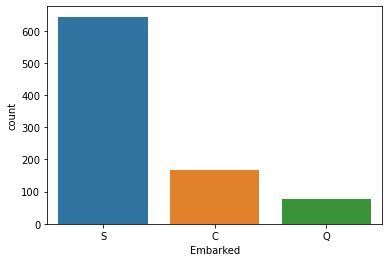

In [54]:
sns.countplot(x="Embarked",data=train)

In [55]:
#We can see Embarked column has few nan values, lets fill it with S as it is the highest occuring point

In [56]:
train.Embarked.isna().sum() # There are two na values

2

In [57]:
train["Embarked"]=train["Embarked"].replace(np.nan,"S")

In [58]:
train.Embarked.isna().sum() # There are two na values

0

In [59]:
#Now, the encoding, we can encode,
# "S" with 1 and "C" with 2, "Q" with 3
# This method is quite inefficinet when we have large number of unique values.
# Instead we can use a pandas inbuilt function

In [60]:
train1 = pd.get_dummies(train,columns=["Embarked"],drop_first=True)
#Drop_First is true because we can know the 3rd values if we know the other 2.
#Eg.  If we know S and Q is 0, that means C is 1.

In [61]:
train1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1


In [62]:
# Lets make a Family column. Add Parch + SibSp

In [63]:
train["Family"] = train["SibSp"]+train["Parch"]
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C85,C,1


In [64]:
#Also, the fare shown here is for entire family, lets try to see the fare per person in a family.

In [65]:
train["Fare_per_person"] = train["Fare"] / (train["Family"] + 1)

In [66]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",male,1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,38.0,1,0,PC 17599,71.2833,C85,C,1,35.64165


In [67]:
#End